In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('grievances.csv')

# Clean column names
df.columns = df.columns.str.strip()

# Convert numeric columns to numbers (coerce errors to NaN)
numeric_cols = df.columns[3:-2]  # all grievance type columns
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Ensure Total column is numeric as well
df['Total'] = pd.to_numeric(df['Total'], errors='coerce').fillna(0)



=== Total Grievances per Period ===


,Period,Total
0,04/22/2024 to 05/05/2024,49.0
1,05/06/2024 to 05/19/2024,46.0
2,05/20/2024 to 06/02/2024,50.0
3,06/03/2024 to 06/16/2024,33.0
4,06/17/2024 to 06/30/2024,29.0
5,07/01/2024 to 07/14/2024,37.0
6,07/15/2024 to 07/28/2024,44.0
7,07/29/2024 to 08/11/2024,65.0
8,08/12/2024 to 08/25/2024,72.0
9,08/26/2024 to 09/08/2024,39.0


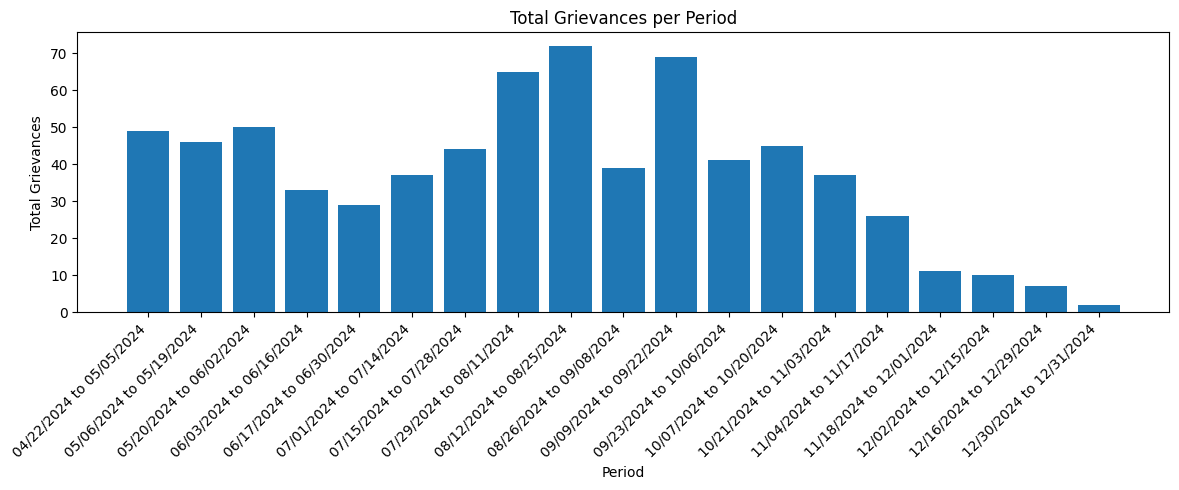

In [5]:

# Total grievances per period ---
period_summary = df.groupby(['Period Start', 'Period End'])['Total'].sum().reset_index()
period_summary['Period'] = period_summary['Period Start'] + ' to ' + period_summary['Period End']

print("\n=== Total Grievances per Period ===")
display(period_summary[['Period', 'Total']])

# Plot total grievances per period
plt.figure(figsize=(12,5))
plt.bar(period_summary['Period'], period_summary['Total'])
plt.xticks(rotation=45, ha='right')
plt.title('Total Grievances per Period')
plt.xlabel('Period')
plt.ylabel('Total Grievances')
plt.tight_layout()
plt.show()



=== Total Grievances per Shelter ===


,Emergency Temporary Shelter,Total
3,Elston Shelter,129.0
0,AIC,70.0
9,MWRD,70.0
14,Social Club,60.0
12,Ogden,47.0
15,South DuSable,45.0
19,West Lake,43.0
16,Super 8 Hotel,39.0
13,Parthenon,39.0
11,North Western Shelter,38.0


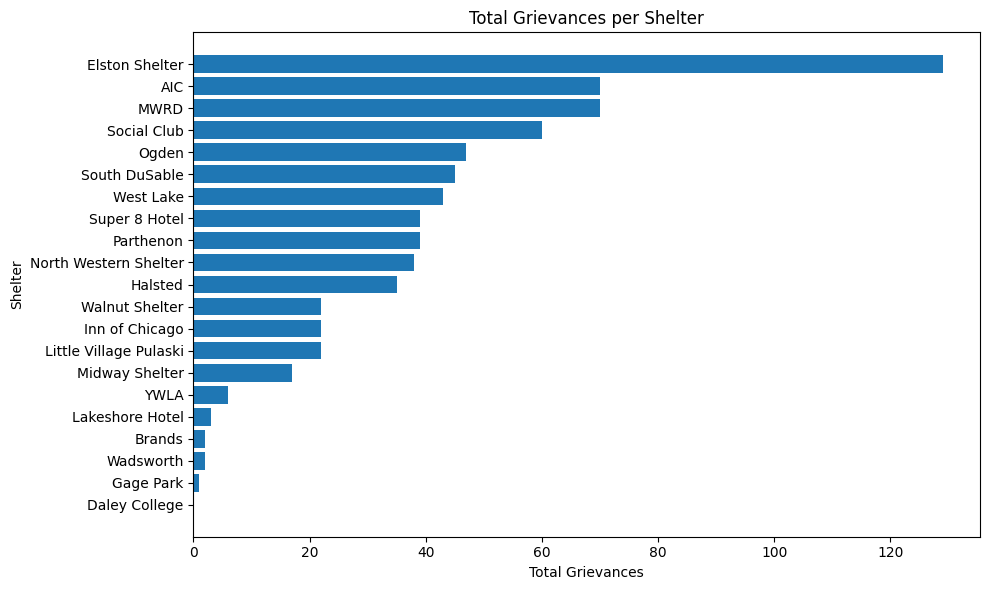

In [7]:

#  Total grievances per shelter ---
shelter_summary = df.groupby('Emergency Temporary Shelter')['Total'].sum().reset_index().sort_values('Total', ascending=False)

print("\n=== Total Grievances per Shelter ===")
display(shelter_summary)

# Plot total grievances per shelter
plt.figure(figsize=(10,6))
plt.barh(shelter_summary['Emergency Temporary Shelter'], shelter_summary['Total'])
plt.gca().invert_yaxis()
plt.title('Total Grievances per Shelter')
plt.xlabel('Total Grievances')
plt.ylabel('Shelter')
plt.tight_layout()
plt.show()



=== Breakdown by Category per Shelter ===


,Emergency Temporary Shelter,Food,Medical,Policy,Resident,Security Issue,Shelter Staff,Supplies / Donations,Vendor,Work Authorization,Facility,Benefits,Other,Unknown / Pending
0,AIC,7.0,1.0,4.0,3.0,0.0,26.0,1.0,0.0,0.0,0.0,0.0,4.0,24.0
1,Brands,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Daley College,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Elston Shelter,10.0,0.0,0.0,4.0,3.0,84.0,1.0,1.0,5.0,5.0,0.0,1.0,15.0
4,Gage Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,Halsted,2.0,2.0,1.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
6,Inn of Chicago,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,16.0
7,Lakeshore Hotel,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,Little Village Pulaski,1.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
9,MWRD,7.0,0.0,0.0,2.0,2.0,38.0,1.0,4.0,0.0,1.0,0.0,1.0,14.0


<Figure size 1200x700 with 0 Axes>

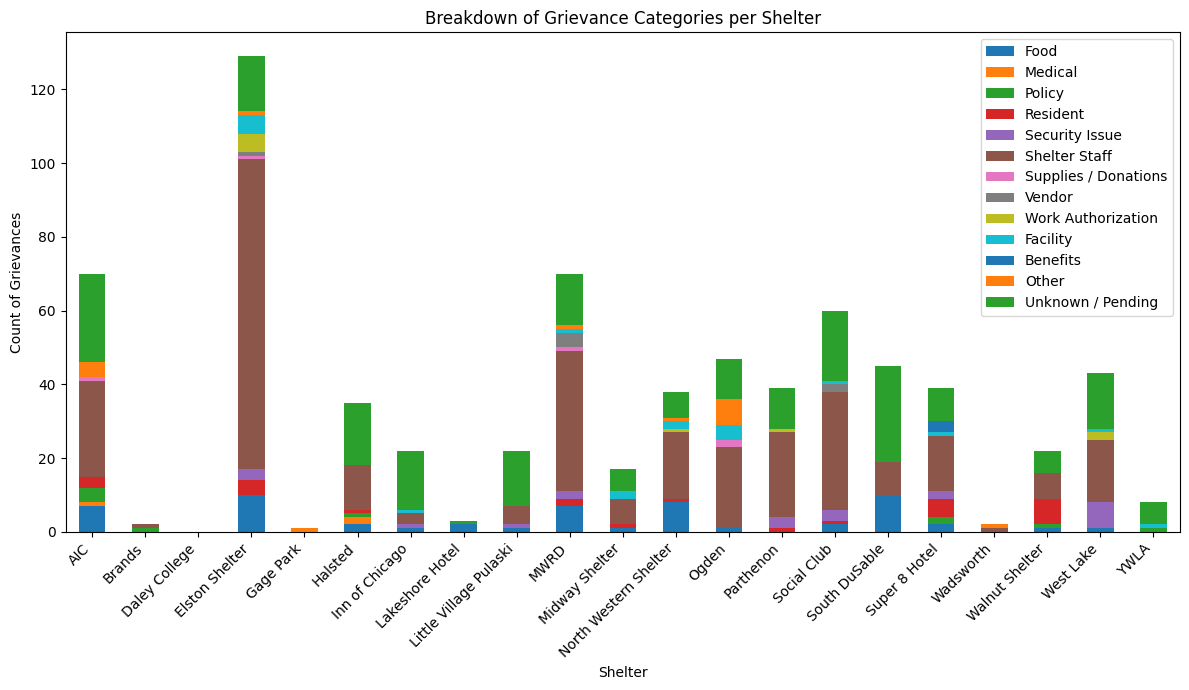

In [ ]:

# Category totals per shelter ---
category_cols = [col for col in df.columns if col not in ['Emergency Temporary Shelter','Period Start','Period End','Total','Record ID']]
category_breakdown = df.groupby('Emergency Temporary Shelter')[category_cols].sum().reset_index()

print("\n=== Breakdown by Category per Shelter ===")
display(category_breakdown)

#  stacked bar chart for main categories
plt.figure(figsize=(12,7))
category_breakdown.set_index('Emergency Temporary Shelter')[numeric_cols].plot(
    kind='bar', stacked=True, figsize=(12,7)
)
plt.title('Breakdown of Grievance Categories per Shelter')
plt.xlabel('Shelter')
plt.ylabel('Count of Grievances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [9]:

period_summary.to_csv('summary_by_period.csv', index=False)
shelter_summary.to_csv('summary_by_shelter.csv', index=False)
category_breakdown.to_csv('summary_by_category.csv', index=False)

